In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import json
import ta
import matplotlib.pyplot as plt

data_tickers = pd.read_excel('S&P_500_V24.01_2024-06-24.xlsx')
data_tickers
tickers = list(data_tickers['Ticker'])

In [ ]:

# One time stock data collection
# Define the stock tickers for each sector

tech_stocks = ['AAPL', 'MSFT', 'GOOGL', 'IBM']  # Apple, Microsoft, Alphabet, IBM
finance_stocks = ['JPM', 'BAC', 'WFC', 'GS']  # JPMorgan Chase, Bank of America, Wells Fargo, Goldman Sachs
industrial_stocks = ['MMM', 'GE', 'HON', 'CAT']  # 3M, General Electric, Honeywell, Caterpillar
fmcg_stocks = ['KO', 'PEP', 'PG', 'CL']  # Coca-Cola, PepsiCo, Procter & Gamble, Colgate-Palmolive

# Combine all stock tickers into one list
all_stocks = tech_stocks + finance_stocks + industrial_stocks + fmcg_stocks

# Define the data period
start_date = '2013-01-01'
end_date = '2023-03-31'

# Download the data
data = yf.download(all_stocks, start=start_date, end=end_date)['Adj Close']

# Save the data to a CSV file
data.to_csv('stocks_data.csv')

# Display the data for verification
data.head(2)

[*********************100%%**********************]  1 of 1 completed


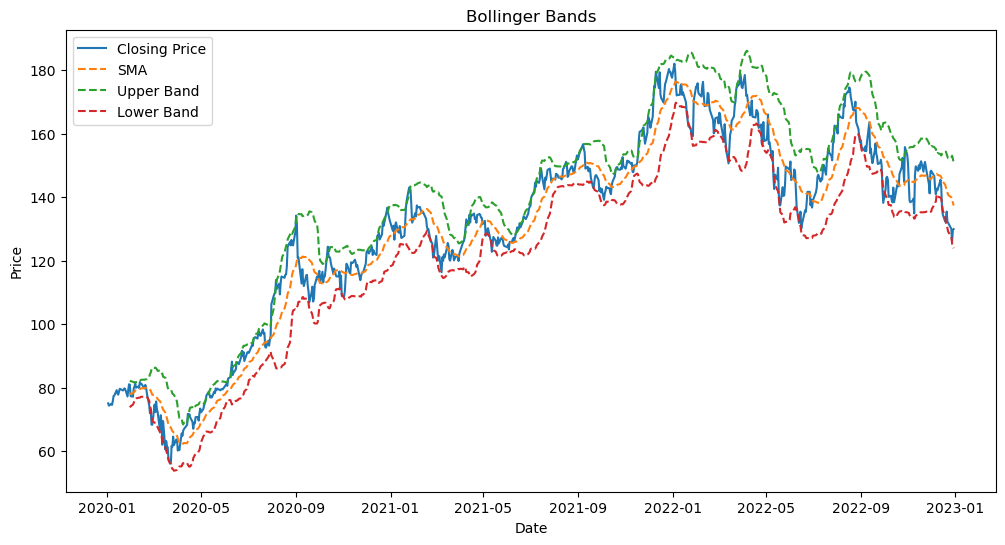

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical data for a specific stock
stock_data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

def calculate_bollinger_bands(data, window=20, num_of_std=2):
    # Calculate the Simple Moving Average (SMA)
    data['SMA'] = data['Close'].rolling(window=window).mean()
    
    # Calculate the standard deviation
    data['STD'] = data['Close'].rolling(window=window).std()
    
    # Calculate the upper Bollinger Band
    data['Upper Band'] = data['SMA'] + (data['STD'] * num_of_std)
    
    # Calculate the lower Bollinger Band
    data['Lower Band'] = data['SMA'] - (data['STD'] * num_of_std)
    
    return data

stock_data = calculate_bollinger_bands(stock_data)

def plot_bollinger_bands(data):
    plt.figure(figsize=(12, 6))
    
    # Plot the closing price and Bollinger Bands
    plt.plot(data['Close'], label='Closing Price')
    plt.plot(data['SMA'], label='SMA', linestyle='--')
    plt.plot(data['Upper Band'], label='Upper Band', linestyle='--')
    plt.plot(data['Lower Band'], label='Lower Band', linestyle='--')
    
    # Add title and labels
    plt.title('Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    
    # Show plot
    plt.show()

plot_bollinger_bands(stock_data)

**Need to decide a Threshhold for High Volatile Stocks**

In [3]:
import yfinance as yf
import pandas as pd



# List of stock tickers
# tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Fetch historical data for each stock
def fetch_data(ticker):
    return yf.download(ticker, start='2013-01-01', end='2024-01-01')

stock_data = {ticker: fetch_data(ticker) for ticker in tickers}

def calculate_bollinger_bands(data, window=20, num_of_std=2):
    data['SMA'] = data['Close'].rolling(window=window).mean()
    data['STD'] = data['Close'].rolling(window=window).std()
    data['Upper Band'] = data['SMA'] + (data['STD'] * num_of_std)
    data['Lower Band'] = data['SMA'] - (data['STD'] * num_of_std)
    data['Band Width'] = data['Upper Band'] - data['Lower Band']
    return data

stock_data = {ticker: calculate_bollinger_bands(data) for ticker, data in stock_data.items()}

def calculate_volatility(data):
    return data['Band Width'].mean()

stock_volatility = {ticker: calculate_volatility(data) for ticker, data in stock_data.items()}

# Convert the dictionary to a DataFrame for easy sorting
volatility_df = pd.DataFrame.from_dict(stock_volatility, orient='index', columns=['Volatility'])

# Sort the stocks by volatility
volatility_df = volatility_df.sort_values(by='Volatility', ascending=False)

# Display the most volatile stocks
#print(volatility_df)

# save the file 

volatility_df.to_csv('volatility_df.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [4]:
volatility_df

,Volatility
NVR,332.758744
BKNG,221.578157
CMG,119.067665
AZO,110.754999
MTD,81.909869
...,...
AMCR,0.878810
SOLV,NaN
BF.B,NaN
GEV,NaN


[*********************100%%**********************]  1 of 1 completed


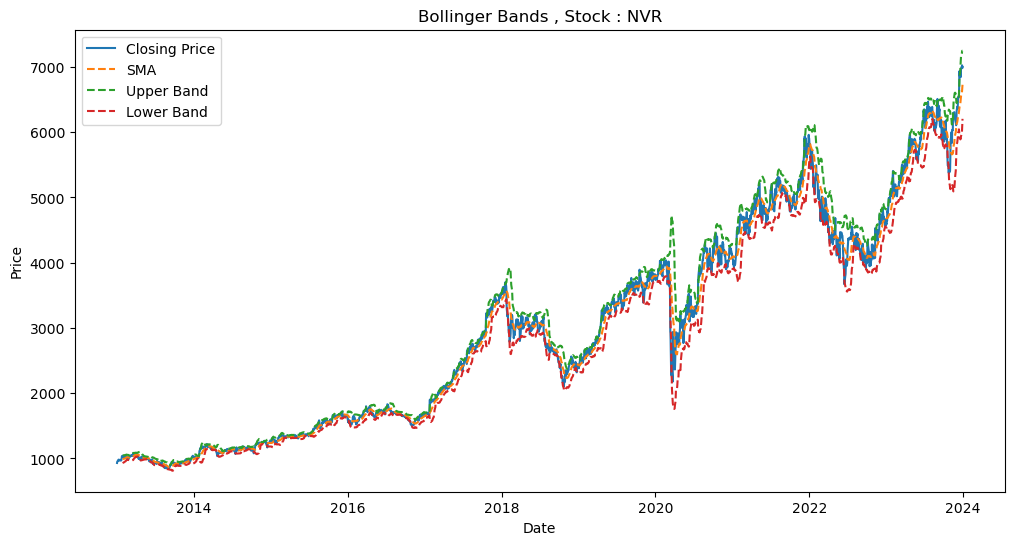

In [7]:


# Fetch historical data for a specific stock
stock_data = yf.download('NVR', start='2013-01-01', end='2023-12-31')

def calculate_bollinger_bands(data, window=20, num_of_std=2):
    # Calculate the Simple Moving Average (SMA)
    data['SMA'] = data['Close'].rolling(window=window).mean()
    
    # Calculate the standard deviation
    data['STD'] = data['Close'].rolling(window=window).std()
    
    # Calculate the upper Bollinger Band
    data['Upper Band'] = data['SMA'] + (data['STD'] * num_of_std)
    
    # Calculate the lower Bollinger Band
    data['Lower Band'] = data['SMA'] - (data['STD'] * num_of_std)
    
    return data

stock_data = calculate_bollinger_bands(stock_data)

def plot_bollinger_bands(data):
    plt.figure(figsize=(12, 6))
    
    # Plot the closing price and Bollinger Bands
    plt.plot(data['Close'], label='Closing Price')
    plt.plot(data['SMA'], label='SMA', linestyle='--')
    plt.plot(data['Upper Band'], label='Upper Band', linestyle='--')
    plt.plot(data['Lower Band'], label='Lower Band', linestyle='--')
    
    # Add title and labels
    plt.title('Bollinger Bands , Stock : ' + 'NVR' )
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    
    # Show plot
    plt.show()

plot_bollinger_bands(stock_data)

In [ ]:
# Fetch historical data for a specific stock
stock_data = yf.download('NVR', start='2013-01-01', end='2023-12-31')

def calculate_bollinger_bands(data, window=20, num_of_std=2):
    # Calculate the Simple Moving Average (SMA)
    data['SMA'] = data['Close'].rolling(window=window).mean()
    
    # Calculate the standard deviation
    data['STD'] = data['Close'].rolling(window=window).std()
    
    # Calculate the upper Bollinger Band
    data['Upper Band'] = data['SMA'] + (data['STD'] * num_of_std)
    
    # Calculate the lower Bollinger Band
    data['Lower Band'] = data['SMA'] - (data['STD'] * num_of_std)
    
    return data

stock_data = calculate_bollinger_bands(stock_data)

def plot_bollinger_bands(data):
    plt.figure(figsize=(12, 6))
    
    # Plot the closing price and Bollinger Bands
    plt.plot(data['Close'], label='Closing Price')
    plt.plot(data['SMA'], label='SMA', linestyle='--')
    plt.plot(data['Upper Band'], label='Upper Band', linestyle='--')
    plt.plot(data['Lower Band'], label='Lower Band', linestyle='--')
    
    # Add title and labels
    plt.title('Bollinger Bands , Stock : ' + 'NVR' )
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    
    # Show plot
    plt.show()

plot_bollinger_bands(stock_data)

In [ ]:
# Fetch historical data for a specific stock
stock_data = yf.download('NVR', start='2013-01-01', end='2023-12-31')

def calculate_bollinger_bands(data, window=20, num_of_std=2):
    # Calculate the Simple Moving Average (SMA)
    data['SMA'] = data['Close'].rolling(window=window).mean()
    
    # Calculate the standard deviation
    data['STD'] = data['Close'].rolling(window=window).std()
    
    # Calculate the upper Bollinger Band
    data['Upper Band'] = data['SMA'] + (data['STD'] * num_of_std)
    
    # Calculate the lower Bollinger Band
    data['Lower Band'] = data['SMA'] - (data['STD'] * num_of_std)
    
    return data

stock_data = calculate_bollinger_bands(stock_data)

def plot_bollinger_bands(data):
    plt.figure(figsize=(12, 6))
    
    # Plot the closing price and Bollinger Bands
    plt.plot(data['Close'], label='Closing Price')
    plt.plot(data['SMA'], label='SMA', linestyle='--')
    plt.plot(data['Upper Band'], label='Upper Band', linestyle='--')
    plt.plot(data['Lower Band'], label='Lower Band', linestyle='--')
    
    # Add title and labels
    plt.title('Bollinger Bands , Stock : ' + 'NVR' )
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    
    # Show plot
    plt.show()

plot_bollinger_bands(stock_data)

In [ ]:
# Fetch historical data for a specific stock
stock_data = yf.download('NVR', start='2013-01-01', end='2023-12-31')

def calculate_bollinger_bands(data, window=20, num_of_std=2):
    # Calculate the Simple Moving Average (SMA)
    data['SMA'] = data['Close'].rolling(window=window).mean()
    
    # Calculate the standard deviation
    data['STD'] = data['Close'].rolling(window=window).std()
    
    # Calculate the upper Bollinger Band
    data['Upper Band'] = data['SMA'] + (data['STD'] * num_of_std)
    
    # Calculate the lower Bollinger Band
    data['Lower Band'] = data['SMA'] - (data['STD'] * num_of_std)
    
    return data

stock_data = calculate_bollinger_bands(stock_data)

def plot_bollinger_bands(data):
    plt.figure(figsize=(12, 6))
    
    # Plot the closing price and Bollinger Bands
    plt.plot(data['Close'], label='Closing Price')
    plt.plot(data['SMA'], label='SMA', linestyle='--')
    plt.plot(data['Upper Band'], label='Upper Band', linestyle='--')
    plt.plot(data['Lower Band'], label='Lower Band', linestyle='--')
    
    # Add title and labels
    plt.title('Bollinger Bands , Stock : ' + 'NVR' )
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    
    # Show plot
    plt.show()

plot_bollinger_bands(stock_data)

In [17]:
raw_data = yf.download (tickers = "^GSPC", start = "2023-01-01", 
                              end = "2024-01-31", interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [18]:
raw_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,3853.290039,3878.459961,3794.330078,3824.139893,3824.139893,3959140000
2023-01-04,3840.360107,3873.159912,3815.770020,3852.969971,3852.969971,4414080000
2023-01-05,3839.739990,3839.739990,3802.419922,3808.100098,3808.100098,3893450000
2023-01-06,3823.370117,3906.189941,3809.560059,3895.080078,3895.080078,3923560000
2023-01-09,3910.820068,3950.570068,3890.419922,3892.090088,3892.090088,4311770000
...,...,...,...,...,...,...
2024-01-24,4888.560059,4903.680176,4865.939941,4868.549805,4868.549805,4330030000
2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156,4894.160156,4020430000
2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215,4890.970215,3353400000


In [ ]:
import yfinance as yf
import pandas as pd
import ta

# Define stock lists
tech_stocks = ['AAPL', 'MSFT', 'GOOGL', 'IBM']
finance_stocks = ['JPM', 'BAC', 'WFC', 'GS']
industrial_stocks = ['MMM', 'GE', 'HON', 'CAT']
fmcg_stocks = ['KO', 'PEP', 'PG', 'CL']

# Combine all stock tickers into one list
all_stocks = tech_stocks + finance_stocks + industrial_stocks + fmcg_stocks

# Define the data period
start_date = '2015-01-01'
end_date = '2023-03-31'

# Download the full stock data (Open, High, Low, Close, Volume, and Adj Close)
data = yf.download(all_stocks, start=start_date, end=end_date)

# Initialize a dictionary to store all indicators
all_indicators = {}

# Calculate indicators for each stock
for stock in all_stocks:
    # Extract the stock data from the MultiIndex DataFrame
    stock_data = data.xs(stock, level=1, axis=1)
    
    # Calculate indicators
    stock_data['SMA'] = ta.trend.SMAIndicator(stock_data['Adj Close'], window=14).sma_indicator()
    stock_data['EMA'] = ta.trend.EMAIndicator(stock_data['Adj Close'], window=14).ema_indicator()
    stock_data['RSI'] = ta.momentum.RSIIndicator(stock_data['Adj Close'], window=14).rsi()
    macd = ta.trend.MACD(stock_data['Adj Close'])
    stock_data['MACD'] = macd.macd()
    stock_data['MACD_Signal'] = macd.macd_signal()
    stock_data['MACD_Diff'] = macd.macd_diff()
    stock_data['OBV'] = ta.volume.OnBalanceVolumeIndicator(stock_data['Adj Close'], stock_data['Volume']).on_balance_volume()
    stock_data['ATR'] = ta.volatility.AverageTrueRange(stock_data['High'], stock_data['Low'], stock_data['Adj Close']).average_true_range()
    bollinger = ta.volatility.BollingerBands(stock_data['Adj Close'])
    stock_data['Bollinger_High'] = bollinger.bollinger_hband()
    stock_data['Bollinger_Low'] = bollinger.bollinger_lband()
    stock_data['ADX'] = ta.trend.ADXIndicator(stock_data['High'], stock_data['Low'], stock_data['Adj Close']).adx()
    stock_data['CCI'] = ta.trend.CCIIndicator(stock_data['High'], stock_data['Low'], stock_data['Adj Close']).cci()
    stock_data['Williams %R'] = ta.momentum.WilliamsRIndicator(stock_data['High'], stock_data['Low'], stock_data['Adj Close']).williams_r()
    
    # Store the calculated indicators
    all_indicators[stock] = stock_data

# Combine all indicators into a single DataFrame
combined_indicators = pd.concat(all_indicators, axis=1, keys=all_stocks)

# Display the combined DataFrame
combined_indicators.head(10)

combined_indicators.to_csv('combined_data.csv')

In [9]:
combined_indicators.head(20)

AAPL                                                         \
Price       Adj Close      Close       High        Low       Open     Volume   
Date                                                                           
2015-01-02  24.402172  27.332500  27.860001  26.837500  27.847500  212818400   
2015-01-05  23.714725  26.562500  27.162500  26.352501  27.072500  257142000   
2015-01-06  23.716951  26.565001  26.857500  26.157499  26.635000  263188400   
2015-01-07  24.049519  26.937500  27.049999  26.674999  26.799999  160423600   
2015-01-08  24.973553  27.972500  28.037500  27.174999  27.307501  237458000   
2015-01-09  25.000336  28.002501  28.312500  27.552500  28.167500  214798000   
2015-01-12  24.384308  27.312500  28.157499  27.200001  28.150000  198603200   
2015-01-13  24.600811  27.555000  28.200001  27.227501  27.857500  268367600   
2015-01-14  24.507072  27.450001  27.622499  27.125000  27.260000  195826400   
2015-01-15  23.841948  26.705000  27.514999  26.665001  27.500000  240056000   
2015-01-16  23.656689  26.497499  26.895000  26.299999  26.757500  314053200   
2015-01-20  24.266016  27.180000  27.242500  26.625000  26.959999  199599600   
2015-01-21  24.451273  27.387501  27.764999  27.067499  27.237499  194303600   
2015-01-22  25.087389  28.100000  28.117500  27.430000  27.565001  215185600   
2015-01-23  25.216843  28.245001  28.437500  27.882500  28.075001  185859200   
2015-01-26  25.243631  28.275000  28.590000  28.200001  28.434999  222460000   
2015-01-27  24.359766  27.285000  28.120001  27.257500  28.105000  382274800   
2015-01-28  25.736898  28.827499  29.530001  28.827499  29.407499  585908400   
2015-01-29  26.538172  29.725000  29.797501  28.889999  29.080000  337745600   
2015-01-30  26.149805  29.290001  30.000000  29.212500  29.600000  334982000   

                                                  ...   CL              \
Price             SMA        EMA        RSI MACD  ... MACD MACD_Signal   
Date                                              ...                    
2015-01-02        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-05        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-06        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-07        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-08        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-09        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-12        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-13        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-14        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-15        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-16        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-20        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-21        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-22  24.332340  24.395684  60.986533  NaN  ...  NaN         NaN   
2015-01-23  24.390531  24.505172  62.490233  NaN  ...  NaN         NaN   
2015-01-26  24.499738  24.603633  62.809680  NaN  ...  NaN         NaN   
2015-01-27  24.545654  24.571118  48.218585  NaN  ...  NaN         NaN   
2015-01-28  24.666181  24.726555  62.741672  NaN  ...  NaN         NaN   
2015-01-29  24.777939  24.968104  68.310787  NaN  ...  NaN         NaN   
2015-01-30  24.860044  25.125664  63.366871  NaN  ...  NaN         NaN   

                                                                             \
Price      MACD_Diff       OBV        ATR Bollinger_High Bollinger_Low  ADX   
Date                                                                          
2015-01-02       NaN   2522800   0.000000            NaN           NaN  0.0   
2015-01-05       NaN   -427900   0.000000            NaN           NaN  0.0   
2015-01-06       NaN  -3865300   0.000000            NaN           NaN  0.0   

In [15]:
with open('AAPL_news.json', 'r') as file:
    news = json.load(file)


# Normalize the JSON data into a flat table
pd.json_normalize(news['articles'])

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,Joe Rossignol,"Apple Becomes $3 Trillion Company Again, But N...",Fans of large numbers will be happy to know th...,https://www.macrumors.com/2024/06/05/aapl-vs-n...,https://images.macrumors.com/t/hTWtXD99jUuYkTy...,2024-06-05T20:29:18Z,Fans of large numbers will be happy to know th...,None,MacRumors
1,Ben Lovejoy,"Nvidia overtakes AAPL to exceed $3T value, win...",Nvidia has overtaken AAPL in the market cap st...,https://9to5mac.com/2024/06/06/nvidia-overtake...,https://i0.wp.com/9to5mac.com/wp-content/uploa...,2024-06-06T11:06:46Z,Nvidia has overtaken AAPL in the market cap st...,None,9to5Mac
2,Julie Hyman,Investors won't want to own Apple in four year...,Apple (AAPL) shares are rising to intraday hig...,https://finance.yahoo.com/video/investors-avoi...,https://s.yimg.com/ny/api/res/1.2/Phs2ctLejX93...,2024-06-11T20:25:59Z,Apple (AAPL) shares are rising to intraday hig...,None,Yahoo Entertainment
3,Seana Smith,Apple wants to redefine AI as 'Apple intellige...,Apple's (AAPL) Worldwide Developers Conference...,https://finance.yahoo.com/video/apple-wants-re...,https://s.yimg.com/ny/api/res/1.2/g.dSjj25.vTj...,2024-06-10T14:17:22Z,Apple's (AAPL) Worldwide Developers Conference...,None,Yahoo Entertainment
4,Benjamin Mayo,Apple stock hits record high as investors reac...,Apple investors are reacting strongly to the c...,https://9to5mac.com/2024/06/11/apple-stock-hit...,https://i0.wp.com/9to5mac.com/wp-content/uploa...,2024-06-11T15:43:39Z,Apple investors are reacting strongly to the c...,None,9to5Mac
...,...,...,...,...,...,...,...,...,...
95,applech2,elago、AppleのVision Proを保護するシリコン製の「Silicone Tra...,elagoがAppleのVision Proを保護するシリコン製の「Silicone Tra...,https://applech2.com/archives/20240602-elago-s...,https://applech2.com/wp-content/uploads/2024/0...,2024-06-01T23:48:24Z,elagoAppleVision ProSilicone TraySilicone Batt...,None,Applech2.com
96,applech2,シングルファイルのリピート機能や外部オーディオファイルの読み込みメニューなどをサポートしたM...,シングルファイルのリピート機能や外部オーディオファイルの読み込みメニューなどをサポートしたM...,https://applech2.com/archives/20240603-iina-fo...,https://applech2.com/wp-content/uploads/2024/0...,2024-06-02T20:15:12Z,MacIINA v1.3.5\r\nLinuxmpvFFmpegMacIINA for Ma...,None,Applech2.com
97,applech2,Apple、2024 Apple Design Awardの受賞者を発表。,AppleがApple Design Award 2024の受賞者を発表しています。詳細は以...,https://applech2.com/archives/20240607-apple-d...,https://applech2.com/wp-content/uploads/2024/0...,2024-06-06T22:32:42Z,AppleApple Design Award 2024\r\nApple202405290...,None,Applech2.com
98,applech2,米Kensington、Bluetoothと2.4GHz接続で最大3台のデバイスと接続できる...,KensingtonがBluetoothと2.4GHz接続で最大3台のデバイスと接続できるエ...,https://applech2.com/archives/20240607-kensing...,https://applech2.com/wp-content/uploads/2024/0...,2024-06-07T07:47:49Z,KensingtonBluetooth2.4GHz3Pro Fit Ergo Wireles...,None,Applech2.com


In [7]:
data.head(2)

Ticker,AAPL,BAC,CAT,CL,GE,GOOGL,GS,HON,IBM,JPM,KO,MMM,MSFT,PEP,PG,WFC
Date,,,,,,,,,,,,,,,,
2015-01-02,24.402172,14.708727,70.907631,55.241547,99.899513,26.447147,161.304260,78.936691,103.354813,48.268318,31.106474,92.933609,40.378063,71.740623,69.090263,41.823158
2015-01-05,23.714722,14.281434,67.164665,54.833481,98.065781,25.943224,156.267914,77.432449,101.728539,46.769829,31.106474,90.837677,40.006760,71.201271,68.761765,40.676266


In [14]:
import requests

api_key = '28838b5ff11a41a6b92520fce55b544a'


def get_news_sentiment(api_key, query, from_date, to_date):
    url = f"https://newsapi.org/v2/everything?q={query}&from={from_date}&to={to_date}&apiKey={api_key}"
    response = requests.get(url)
    articles = response.json().get('articles', [])
    
    return [article['title'] for article in articles]

news_sentiment_data = get_news_sentiment(api_key, 'AAPL', '2023-01-01', '2023-12-31')

In [19]:
from newsapi import NewsApiClient
api = NewsApiClient(api_key='28838b5ff11a41a6b92520fce55b544a')
text = api.get_everything(q='AAPL')



In [21]:
import json
with open('AAPL_news.json', 'w') as fp:
    json.dump(text, fp)

[{'source': {'id': None, 'name': 'MacRumors'},
  'author': 'Joe Rossignol',
  'title': 'Apple Becomes $3 Trillion Company Again, But Nvidia Steals the Moment',
  'description': "Fans of large numbers will be happy to know that Apple became a $3 trillion company again today based on market cap, which is the total value of all of the company's outstanding shares. However, chipmaker Nvidia stole the moment.\n\n\n\n\n\nNvidia not only crossed …",
  'url': 'https://www.macrumors.com/2024/06/05/aapl-vs-nvidia-3-trillion-dollar-companies/',
  'urlToImage': 'https://images.macrumors.com/t/hTWtXD99jUuYkTySQL6_TOl47us=/2500x/article-new/2024/06/Apple-vs-Nvidia.jpg',
  'publishedAt': '2024-06-05T20:29:18Z',
  'content': "Fans of large numbers will be happy to know that Apple became a $3 trillion company again today based on market cap, which is the total value of all of the company's outstanding shares. However, chip… [+1010 chars]"},
 {'source': {'id': None, 'name': '9to5Mac'},
  'author': 'Ben 

In [16]:
import requests

api_key = '28838b5ff11a41a6b92520fce55b544a'

def get_news_sentiment(api_key, query, from_date, to_date):
    url = f"https://newsapi.org/v2/everything?q={query}&from={from_date}&to={to_date}&apiKey={api_key}"
    
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for 4xx or 5xx status codes
        
        articles = response.json().get('articles', [])
        return [article['title'] for article in articles]
    
    except requests.exceptions.RequestException as e:
        print(f"Error fetching news data: {e}")
        return []

# Example usage
news_sentiment_data = get_news_sentiment(api_key, 'AAPL', '2023-01-01', '2023-12-31')
print(news_sentiment_data)

Error fetching news data: 426 Client Error: Upgrade Required for url: https://newsapi.org/v2/everything?q=AAPL&from=2023-01-01&to=2023-12-31&apiKey=28838b5ff11a41a6b92520fce55b544a
[]


In [15]:
news_sentiment_data

[]

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    return ' '.join(tokens)

cleaned_news_sentiment_data = [clean_text(article) for article in news_sentiment_data]

ModuleNotFoundError: No module named 'nltk'

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def get_sentiment_scores(text_list):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = []
    for text in text_list:
        score = analyzer.polarity_scores(text)
        sentiment_scores.append(score['compound'])
    return sentiment_scores

news_sentiment_scores = get_sentiment_scores(cleaned_news_sentiment_data)

In [ ]:

from datetime import datetime

def aggregate_sentiment_by_date(dates, scores):
    df = pd.DataFrame({'date': dates, 'score': scores})
    df['date'] = pd.to_datetime(df['date']).dt.date
    aggregated_sentiment = df.groupby('date').mean()
    return aggregated_sentiment

# Example dates for the sentiment data (should match the length of news_sentiment_scores)
sentiment_dates = ['2023-01-01', '2023-01-01', '2023-01-02', ...]  # Replace with actual dates
aggregated_sentiment = aggregate_sentiment_by_date(sentiment_dates, news_sentiment_scores)

In [ ]:
# Load your stock data
stock_data = yf.download(tickers, start='2015-01-01', end='2023-12-31')['Adj Close']

# Convert stock data to a DataFrame and reset the index to use dates as a column
stock_df = stock_data.reset_index()

# Merge stock data with sentiment data on the date column
merged_data = stock_df.merge(aggregated_sentiment, how='left', left_on='Date', right_index=True)